<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/DigitalTimingDiagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Digital timing diagram

In [ ]:
import numpy as np
import scipy as sp
from scipy import signal
from matplotlib import pyplot as plt

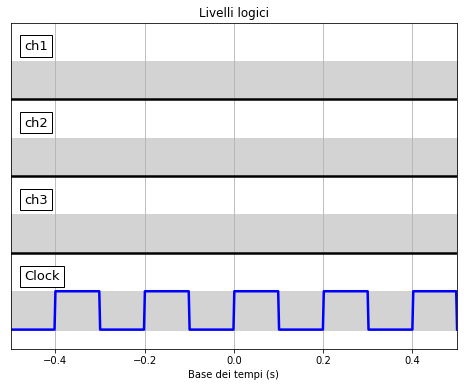

In [ ]:
time_div = 0.1 #s
clock_fq = 5   #Hz
clk = 1./clock_fq

timebase = np.linspace(time_div * -5., time_div * 5., 500)

def plotLogicLevel(ch1, ch1_name, ch2, ch2_name, ch3, ch3_name, timebase, clock_fq = 5, time_div = 0.1):
   clockwf  = signal.square(2 * np.pi * clock_fq * timebase)
   fig, ax  = plt.subplots(figsize=(8,6))
   ax.plot(timebase, clockwf * 0.5 - 2.5, color="blue", linewidth=2.5)
   ax.plot(timebase, ch3 - 1, color="black", linewidth=2.5)
   ax.plot(timebase, ch2 + 1, color="black", linewidth=2.5)
   ax.plot(timebase, ch1 + 3, color="black", linewidth=2.5)
   ax.get_yaxis().set_visible(False)
   plt.xlabel("Base dei tempi (s)")
   plt.xlim([time_div * -5., time_div * 5.])
   plt.ylim([-3.5,  5])
   plt.title("Livelli logici")
   
   #ax.hlines(-2, -0.6, 0.6, color = "black", linestyle="--")
   #ax.hlines(-3, -0.6, 0.6, color = "black", linestyle="--")
   ax.fill_between(timebase, -2, -3, color="lightgray")
   ax.text(-0.47,-2 + 0.3, "Clock", fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, -1, +0, color="lightgray")
   ax.text(-0.47, + 0.3, ch3_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, +1, +2, color="lightgray")
   ax.text(-0.47, +2 + 0.3, ch2_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.fill_between(timebase, +3, +4, color="lightgray")
   ax.text(-0.47, +4 + 0.3, ch1_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
   ax.grid()
    
plotLogicLevel(np.zeros(500), "ch1", np.zeros(500), "ch2", np.zeros(500), "ch3", timebase)

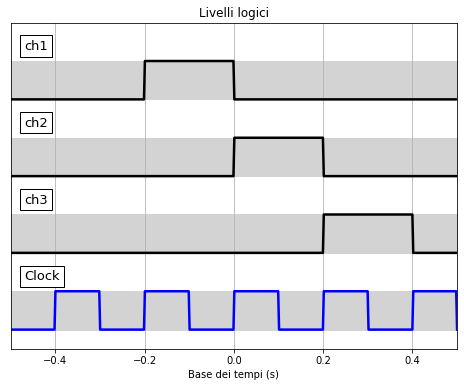

In [ ]:
ch1 = np.heaviside(timebase + 1 * clk, 1) * np.heaviside(-1 * timebase + 0 * clk, 1)  
ch2 = np.heaviside(timebase + 0 * clk, 1) * np.heaviside(-1 * timebase + 1 * clk, 1) 
ch3 = np.heaviside(timebase - 1 * clk, 1) * np.heaviside(-1 * timebase + 2 * clk, 1) 
plotLogicLevel(ch1, "ch1", ch2, "ch2", ch3, "ch3", timebase)